Os dados de reservas de hotéis foram carregados corretamente e incluem uma variedade de colunas que podem ser exploradas. Aqui estão algumas das colunas mais relevantes:

- **hotel**: Tipo de hotel (Resort ou Urbano).
- **is_canceled**: Indica se a reserva foi cancelada (0 para não cancelada, 1 para cancelada).
- **lead_time**: Tempo em dias entre a reserva e o check-in.
- **arrival_date_year**: Ano de chegada.
- **arrival_date_month**: Mês de chegada.
- **stays_in_weekend_nights**: Número de noites no fim de semana da estadia.
- **stays_in_week_nights**: Número de noites durante a semana da estadia.
- **adults**: Número de adultos na reserva.
- **children**: Número de crianças na reserva.
- **adr**: Taxa média diária aplicada (tarifa por noite).
- **required_car_parking_spaces**: Número de vagas de estacionamento necessárias.
- **total_of_special_requests**: Número de pedidos especiais feitos pelos clientes.
- **reservation_status**: Status da reserva (Check-Out, Cancelada, etc.).


Esses dados podem ser úteis para explorar perguntas como:

- Quando é mais comum o cancelamento de reservas?
- Qual a relação entre o tempo de antecedência da reserva (lead_time) e o cancelamento?
- Quais fatores influenciam o número de pedidos especiais?


### Etapa do Plano (PACE):

#### 1. Quem são as partes interessadas neste projeto?

- **Gerência do hotel**: A principal parte interessada, pois uma melhor previsão de cancelamentos ou padrões de reservas permite otimizar as operações do hotel, reduzir custos e aumentar a receita.
- **Equipe de Vendas e Marketing**: Interessada em entender os padrões de reservas para adaptar estratégias promocionais.
- **Clientes**: Embora indiretamente, os clientes são beneficiados pela melhoria dos serviços e ofertas.
- **O analista de dados (você)**: Fornecendo insights e previsões com base no comportamento passado dos hóspedes.


#### 2. O que está tentando resolver ou realizar?

O principal objetivo é entender quais fatores influenciam o cancelamento de reservas e o comportamento dos hóspedes em relação à duração da estadia, solicitações especiais, e padrões sazonais. Além disso, pretende-se construir um modelo preditivo para prever se uma reserva será cancelada, ajudando o hotel a planejar melhor a ocupação e a alocação de recursos.


### 3. Quais são as suas observações iniciais ao explorar os dados?

Ao explorar os dados de reservas, algumas observações iniciais podem ser feitas:

- As variáveis relacionadas ao tempo, como “lead_time”, “arrival_date_month”, e “arrival_date_week_number”, podem ter correlações com o cancelamento de reservas.

- A quantidade de pedidos especiais (coluna “total_of_special_requests”) e as vagas de estacionamento requisitadas podem indicar comportamentos específicos de hóspedes.

- A distribuição entre os tipos de hotéis (Resort Hotel e City Hotel) pode apresentar padrões distintos em termos de taxa de cancelamento, duração de estadia, etc.

- Será importante verificar a correlação entre variáveis como “lead_time” (tempo entre a reserva e o check-in) e “is_canceled”, bem como o impacto do tipo de hotel e do tipo de cliente (“customer_type”).

#### •	Ferramentas de análise de dados: 

- **Python** com bibliotecas como pandas, matplotlib, scikit-learn para análise exploratória (EDA) e construção do modelo preditivo.

- **Plataformas de benchmark**: Kaggle e artigos relacionados para comparar soluções e metodologias aplicadas a problemas semelhantes de previsão de cancelamentos e comportamento de clientes em hotéis.

- **Guias e boas práticas de ciência de dados**: Para garantir um processo estruturado e ético de modelagem preditiva.

#### . Tem alguma consideração ética nesta etapa?

Sim, há considerações éticas:

- **Privacidade dos clientes**: Embora os dados já tenham sido anonimizados, é crucial garantir que não haja forma de identificar hóspedes individuais.

- **Implicações preditivas**: O modelo preditivo não deve ser utilizado de maneira que impacte negativamente os clientes, como discriminação baseada em padrões detectados (exemplo: recusar uma reserva por antecipar que o cliente irá cancelar).

- **Transparência**: É importante comunicar claramente como o modelo está sendo utilizado e garantir que ele serve como ferramenta de apoio, e não de decisão final em políticas de cancelamento ou retenção de clientes.


#### Passo 1. Importações
- Importar pacotes
- Carregar conjunto de dados

In [10]:
# Import packages
### YOUR CODE HERE ###
# For data manipulation
import numpy as np
import pandas as pd
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)
# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
# For saving models
import pickle

### Carregar conjunto de dados

`Pandas` é utilizado para ler um conjunto de dados denominado **`hotel_bookings.csv`.** Continue com esta atividade, completando as seguintes instruções.

In [12]:
# Load dataset into a dataframe
hotel_data= pd.read_csv("hotel_bookings.csv")


# Display first few rows of the dataframe
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Passo 2. Exploração de dados (EDA inicial e limpeza de dados)

- Entenda as suas variáveis
- Limpe o seu conjunto de dados (dados em falta, dados redundantes, valores discrepantes)

#### Reúna informações básicas sobre os dados

In [15]:
# Reúna informações básicas sobre os dados
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Reúna estatísticas descritivas sobre os dados

In [17]:
# Reúna estatísticas descritivas sobre os dados
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#### Ver colunas

In [19]:
#Mostra todos os nomes das colunas
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#### Verifique os valores em falta

Verifique se existem valores em falta nos dados.

In [21]:
#Verifica se existem valores em falta
hotel_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [22]:
# 1. Preencher valores ausentes na coluna 'children' com o valor mais frequente (moda)
hotel_data['children'].fillna(hotel_data['children'].mode()[0], inplace=True)

# 2. Preencher valores ausentes na coluna 'country' com o valor mais frequente (moda)
hotel_data['country'].fillna(hotel_data['country'].mode()[0], inplace=True)

# 3. Preencher valores ausentes nas colunas 'agent' e 'company' com 0 (indicando ausência de agente ou empresa)
hotel_data['agent'].fillna(0, inplace=True)
hotel_data['company'].fillna(0, inplace=True)

/var/folders/mp/_1mc66sj15dcx84w85zjp_fr0000gn/T/ipykernel_39344/3023977068.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_data['children'].fillna(hotel_data['children'].mode()[0], inplace=True)
/var/folders/mp/_1mc66sj15dcx84w85zjp_fr0000gn/T/ipykernel_39344/3023977068.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

In [23]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Verifique duplicados

Verifique se existem entradas duplicadas nos dados.

In [25]:
#Verifique se existem duplicados
hotel_data.duplicated().sum()

32013

In [26]:
# Inspecione algumas linhas contendo duplicados, conforme necessário
hotel_data[hotel_data.duplicated()].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,0.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,0.0,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,0.0,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,109.80,0,3,Check-Out,2015-07-08


In [27]:
# Drop duplicates and save resulting dataframe in a new variable as needed
hotel_data1 = hotel_data.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
hotel_data1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


A etapa de limpeza de dados foi concluída com sucesso. Aqui estão as principais ações realizadas e as informações básicas após a limpeza:

#### Limpeza de Dados:

1. **Remoção de Duplicados**: O dataset foi reduzido de 119.390 entradas para 87.396, removendo 31.994 entradas duplicadas.
2. **Tratamento de Valores Ausentes**:
    - A coluna **children** teve seus **4** valores ausentes preenchidos com o valor mais frequente.
    - A coluna **country** teve **488** valores ausentes preenchidos com o valor mais frequente.
    - As colunas **agent** e **company** foram preenchidas com **0**, indicando a ausência de agente ou empresa associada.

- O dataset possui agora **87.396** registros e **32** colunas, sem valores ausentes restantes.
- **Tipos de dados**: 16 colunas numéricas **(int64 e float64)** e 12 colunas categóricas **(object)**.

#### Verifique valores discrepantes
Verifique se existem valores discrepantes nos dados.

In [31]:
# Função para identificar outliers com base no IQR (Quartis)
def detectar_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    print("limite inferior:", limite_inferior)
    print("limite superior:", limite_superior)
    
    # Filtrando os outliers
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers

# Detectando outliers na coluna 'lead_time' (exemplo)
outliers_lead_time = detectar_outliers(hotel_data1, 'lead_time')

# Exibir outliers detectados na coluna 'lead_time'
print("Número de linhas nos dados que contêm valores discrepantes em `lead_time`:", len(outliers_lead_time))

limite inferior: -160.0
limite superior: 296.0
Número de linhas nos dados que contêm valores discrepantes em `lead_time`: 2396


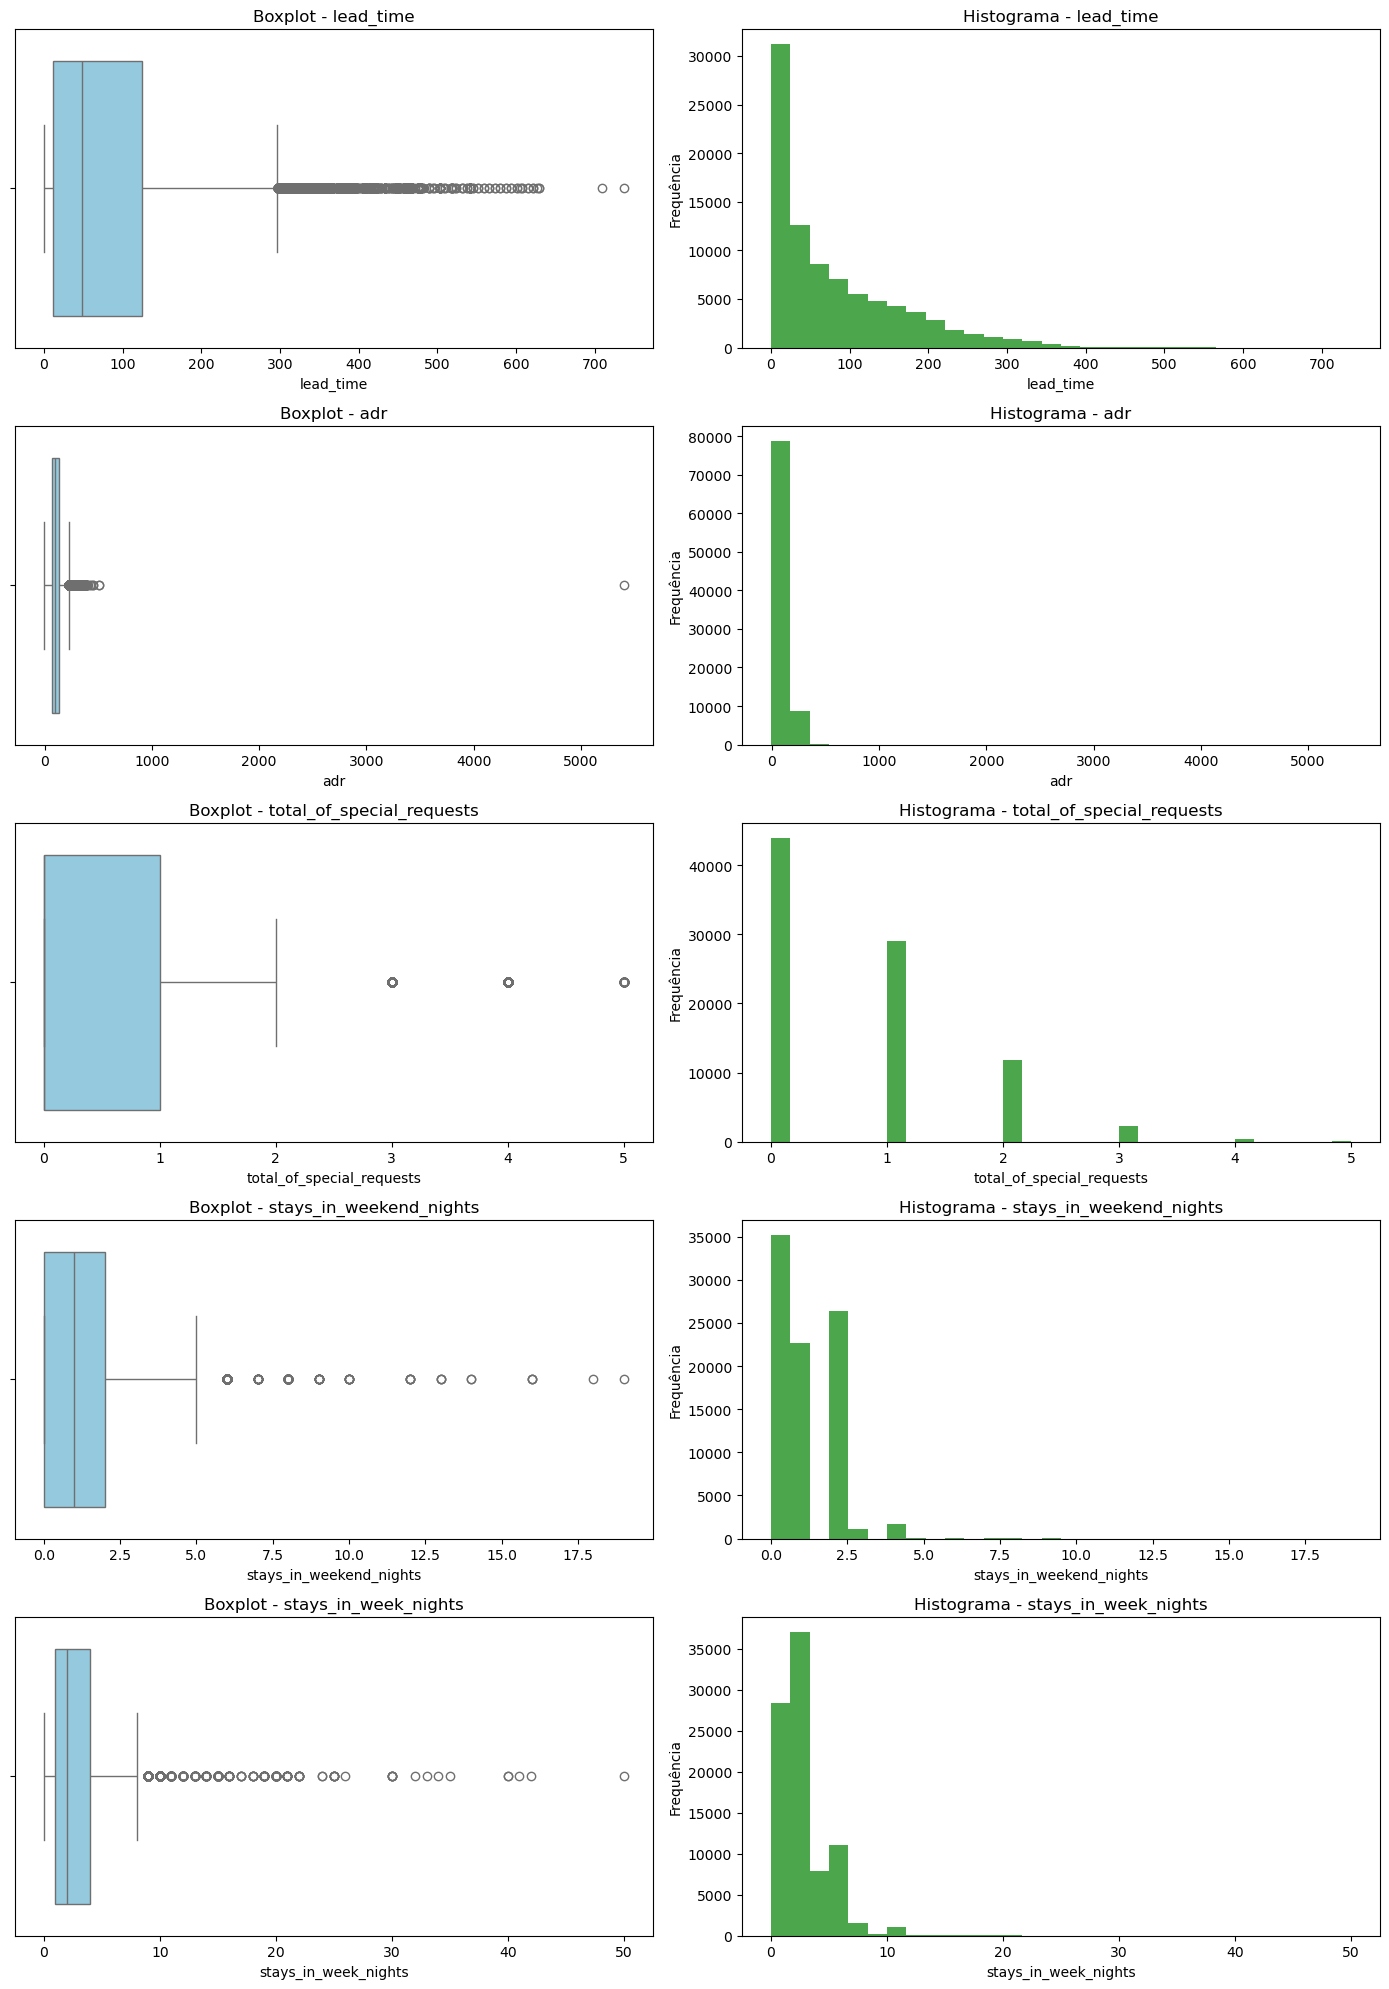

In [32]:
# Selecionar colunas numéricas para análise de outliers
colunas_numericas = ['lead_time', 'adr', 'total_of_special_requests', 'stays_in_weekend_nights', 'stays_in_week_nights']

# Configurar a área do gráfico (2 linhas: uma para o boxplot e outra para o histograma)
fig, axs = plt.subplots(len(colunas_numericas), 2, figsize=(14, len(colunas_numericas) * 4))

# Loop para cada coluna numérica
for i, coluna in enumerate(colunas_numericas):
    # Boxplot
    sns.boxplot(x=hotel_data1[coluna], ax=axs[i, 0], color='skyblue')
    axs[i, 0].set_title(f'Boxplot - {coluna}', fontsize=12)
    
    # Histograma
    axs[i, 1].hist(hotel_data1[coluna], bins=30, color='green', alpha=0.7)
    axs[i, 1].set_title(f'Histograma - {coluna}', fontsize=12)
    axs[i, 1].set_xlabel(coluna)
    axs[i, 1].set_ylabel('Frequência')

# Ajustar espaçamento entre os subplots
plt.tight_layout()
plt.show()

A análise dos outliers na coluna **lead_time** identificou **2.396 valores discrepantes** com limites calculados entre -160 (inferior) e 296 (superior). A análise gráfica mostra a distribuição dos valores de várias colunas numéricas.

Gráficos gerados:

- **Boxplots**: Mostram a presença de outliers nas colunas analisadas.
- **Histogramas**: Exibem a distribuição dos valores, ajudando a visualizar a frequência de valores discrepantes.

# pAce: Analisar Estágio
- Realizar EDA (analisar relações entre variáveis)


💭
### Reflita sobre estas questões ao concluir o estágio de análise.

- O que observou sobre as relações entre as variáveis?
- O que observa sobre as distribuições nos dados?
- Que transformações fez com os seus dados? Por que razão escolheu tomar essas decisões?
- Quais são alguns dos propósitos da EDA antes de construir um modelo preditivo?
- Que recursos utiliza ao concluir esta etapa? (Certifique-se de que inclui os links.)
- Tem alguma consideração ética nesta etapa?

## Etapa de Análise (PACE):

**1. O que observou sobre as relações entre as variáveis?**

- **lead_time e is_canceled**: Parece haver uma relação entre o tempo de antecedência da reserva **(lead_time) e o cancelamento de reservas**. Reservas feitas com muita antecedência tendem a ter uma maior taxa de cancelamento.
- **adr (Average Daily Rate) e is_canceled**: Os preços mais altos também parecem estar relacionados com uma maior chance de cancelamento, o que pode sugerir que os hóspedes com reservas mais caras podem reconsiderar suas estadias.
- **total_of_special_requests e stays_in_week_nights**: Hóspedes que ficam por mais noites durante a semana tendem a fazer mais pedidos especiais.

**2. O que observa sobre as distribuições nos dados?**

- Algumas variáveis, como **lead_time e adr**, possuem distribuições assimétricas, com muitos valores concentrados em uma faixa e uma cauda longa (outliers).
- Variáveis como **total_of_special_requests e stays_in_weekend_nights** são mais centralizadas, mas ainda apresentam um número significativo de valores zero.

**3. Que transformações fez com os seus dados? Por que razão escolheu tomar essas decisões?**

- **Limpeza de valores ausentes**: Colunas como **children, country, agent, e company** tiveram seus valores ausentes tratados (preenchidos com moda ou 0) para garantir que não houvesse falhas no processamento de dados.
- **Remoção de duplicados**: Foram removidas entradas duplicadas para garantir que a análise fosse feita de forma correta e para evitar distorções nas estatísticas.
- **Detecção de outliers**: A análise de outliers foi feita para entender como lidar com valores discrepantes que poderiam distorcer modelos futuros. Outliers não foram removidos imediatamente, mas essa decisão pode ser revista dependendo dos resultados do modelo.

**4. Quais são alguns dos propósitos da EDA antes de construir um modelo preditivo?**

- **Identificar padrões**: A EDA ajuda a encontrar relações importantes entre variáveis e a entender quais delas podem ser relevantes para a modelagem preditiva.
- **Detectar problemas nos dados**: Como valores ausentes, duplicados ou discrepantes que podem afetar a qualidade dos modelos.
- **Guia para transformações**: A EDA orienta sobre possíveis transformações de dados, como normalização, transformação logarítmica ou remoção de outliers, que podem melhorar a performance do modelo.
- **Escolher variáveis para o modelo**: Ajuda a identificar as variáveis que devem ser incluídas ou descartadas no modelo preditivo, dependendo de sua relevância para a variável alvo.


**5. Que recursos utiliza ao concluir esta etapa?**

- **Ferramentas de análise**: Python com as bibliotecas pandas, matplotlib, seaborn e scikit-learn para análise de dados e visualização.
- **Referências e benchmarking**: Análises de datasets semelhantes em plataformas como Kaggle para observar práticas e abordagens comparáveis.
- **Guias de boas práticas**: Recursos como artigos e tutoriais sobre EDA e detecção de outliers.


**6. Tem alguma consideração ética nesta etapa?**

- **Uso responsável dos insights**: As descobertas da análise não devem ser usadas de forma discriminatória ou para prejudicar clientes, especialmente ao lidar com variáveis sensíveis, como o preço da diária (adr).
- **Transparência**: É essencial comunicar os resultados de forma clara e evitar que decisões automáticas sejam tomadas sem considerar o contexto humano.
- **Proteção de dados**: Garantir que as análises e modelos respeitem a privacidade dos dados, mesmo que anonimizados.


### Passo 2. Exploração de dados (Continuar EDA)

Comece por compreender quantos cancelamentos foram feitos e que percentagem de todos os cancelamentos esse número representa.

In [44]:
# Obtenha o número de pessoas que saíram e ficaram
print(hotel_data1['is_canceled'].value_counts())
print()

# Obtenha percentagens de pessoas que saíram versus permaneceram
print(hotel_data1['is_canceled'].value_counts(normalize=True))

is_canceled
0    63353
1    24024
Name: count, dtype: int64

is_canceled
0    0.725054
1    0.274946
Name: proportion, dtype: float64


#### Transformação dos Dados

**Transformar Categorias (Tipo de Hotel, Tipo de Cliente, etc.)**

Variáveis categóricas como o tipo de hotel e tipo de cliente devem ser convertidas em variáveis numéricas para serem usadas em análises ou modelos preditivos.


In [46]:
# Convertendo as variáveis categóricas para numéricas usando pandas get_dummies
hotel_data1 = pd.get_dummies(hotel_data1, columns=['hotel', 'customer_type',], drop_first=True)

# Verificando as primeiras linhas para conferir as novas colunas categorizadas
hotel_data1.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,hotel_Resort Hotel,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,0.0,0,0,Check-Out,2015-07-01,True,False,True,False
1,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,0.0,0,0,Check-Out,2015-07-01,True,False,True,False
2,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,75.0,0,0,Check-Out,2015-07-02,True,False,True,False
3,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,75.0,0,0,Check-Out,2015-07-02,True,False,True,False
4,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,98.0,0,1,Check-Out,2015-07-03,True,False,True,False


#### Criar Novas Colunas (Exemplo: Total de Noites de Estadia)

Para facilitar a análise, podemos criar novas colunas que representem variáveis derivadas, como a duração total da estadia (fins de semana + dias de semana).

In [48]:
# Fazendo uma cópia explícita do DataFrame antes de modificar
hotel_data1= hotel_data1.copy()

# Agora podemos criar ou modificar a coluna sem problemas
hotel_data1['total_stay'] = hotel_data1['stays_in_weekend_nights'] + hotel_data1['stays_in_week_nights']

# Exibindo a nova coluna
hotel_data1[['stays_in_weekend_nights', 'stays_in_week_nights', 'total_stay']].head()

,stays_in_weekend_nights,stays_in_week_nights,total_stay
0,0,0,0
1,0,0,0
2,0,1,1
3,0,1,1
4,0,2,2


#### Verificação Final dos Dados Preparados

Após a limpeza e transformação, sempre é uma boa prática verificar a integridade dos dados e garantir que estão prontos para análise.

In [50]:
# Verificando se há valores ausentes após a limpeza e transformação
print(hotel_data1.isnull().sum())

# Exibindo informações sobre o dataset para conferir os tipos de dados e a presença de colunas categorizadas
hotel_data1.info()

# Exibindo uma descrição estatística dos dados
hotel_data1.describe()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stay
count,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000,87377.00000,87377.00000,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000
mean,0.274946,79.905856,2016.210273,26.840107,15.815203,1.005390,2.625645,1.875906,0.138663,0.010827,0.039084,0.030420,0.18403,0.27165,81.007656,11.009350,0.749728,106.345111,0.084244,0.698616,3.631036
std,0.446490,86.055523,0.686124,13.673425,8.834744,1.031961,2.053685,0.626483,0.455916,0.113609,0.193795,0.369185,1.73208,0.72731,109.940338,54.024552,10.016814,55.005117,0.281561,0.831942,2.763569
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000,2.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000,3.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000,5.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.00000,21.00000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,69.000000


### Visualizações de dados

Aqui estão as principais observações e visualizações geradas a partir da análise dos dados:

1. **Total de Reservas**: O dataset contém **87.396 reservas**.
2. **Reservas Canceladas**: **24.025 reservas** foram **canceladas**, o que representa aproximadamente **27,49%** de todas as reservas.

Total de reservas: 87377
Reservas canceladas: 24024 (27.49%)


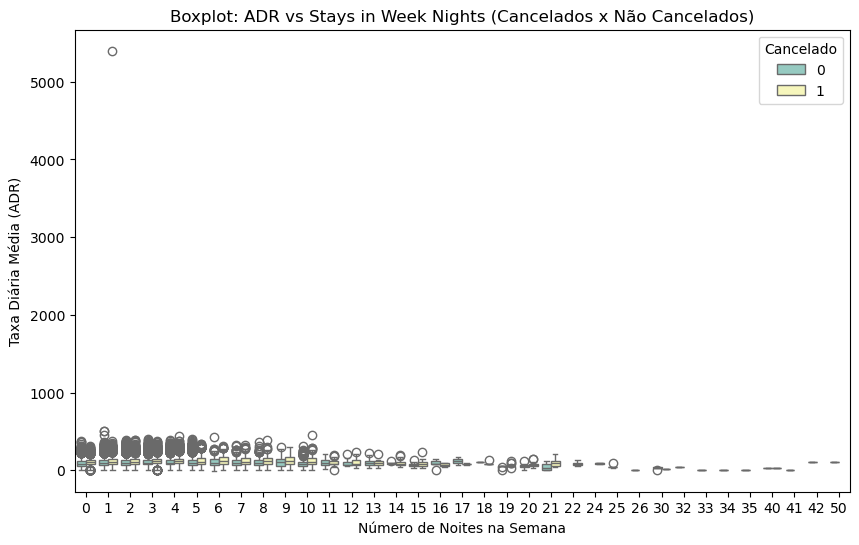

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


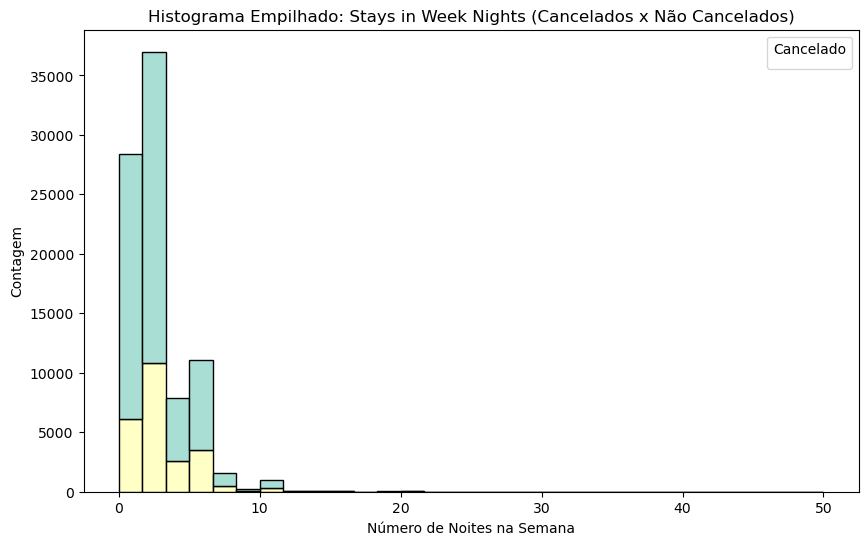

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compreender quantos colaboradores saíram (is_canceled) e que percentagem isso representa
total_reservas = hotel_data1.shape[0]
reservas_canceladas = hotel_data1['is_canceled'].sum()
percentagem_canceladas = (reservas_canceladas / total_reservas) * 100

# Exibir o número e a percentagem de reservas canceladas
print(f"Total de reservas: {total_reservas}")
print(f"Reservas canceladas: {reservas_canceladas} ({percentagem_canceladas:.2f}%)")

# Criar um boxplot empilhado comparando 'adr' (taxa diária) para 'stays_in_week_nights' 
# e comparar com aqueles que cancelaram e aqueles que não cancelaram.
plt.figure(figsize=(10, 6))
sns.boxplot(x='stays_in_week_nights', y='adr', hue='is_canceled', data=hotel_data1, palette='Set3')
plt.title('Boxplot: ADR vs Stays in Week Nights (Cancelados x Não Cancelados)')
plt.xlabel('Número de Noites na Semana')
plt.ylabel('Taxa Diária Média (ADR)')
plt.legend(title='Cancelado', loc='upper right')
plt.show()

# Criar um histograma empilhado para visualizar a distribuição de 'stays_in_week_nights' para aqueles que cancelaram e não cancelaram.
plt.figure(figsize=(10, 6))
sns.histplot(data=hotel_data1, x='stays_in_week_nights', hue='is_canceled', multiple='stack', palette='Set3', bins=30)
plt.title('Histograma Empilhado: Stays in Week Nights (Cancelados x Não Cancelados)')
plt.xlabel('Número de Noites na Semana')
plt.ylabel('Contagem')
plt.legend(title='Cancelado')
plt.show()

**Visualizações Geradas**:

- **Boxplot**: Comparou a taxa diária média (ADR) com o número de noites passadas durante a semana, separando entre reservas canceladas e não canceladas. O gráfico mostrou a distribuição de preços e a variação nas reservas canceladas versus mantidas.

- **Histograma Empilhado**: Visualizou a distribuição do número de noites passadas na semana para hóspedes que cancelaram e não cancelaram. Esse gráfico permitiu visualizar as diferentes concentrações de reservas em diferentes categorias de estadias.

In [55]:
No boxplot, comparou-se a taxa diária média (ADR) com o número de noites durante a semana (stays_in_week_nights), separando as reservas canceladas das não canceladas. Aqui estão as principais observações:

1. Distribuição Geral:

	•	Para a maioria das categorias de “stays_in_week_nights”, as taxas diárias (ADR) variam significativamente tanto para reservas canceladas quanto para não canceladas.
	•	Isso mostra que os valores de ADR têm um impacto nas decisões dos clientes, mas não há um padrão claro entre cancelamentos e preços por número de noites.

2. Sobreposição Significativa:

	•	Existe uma sobreposição entre as faixas de ADR das reservas canceladas e não canceladas em diferentes números de noites na semana.
	•	Isso sugere que a ADR não é suficiente como fator isolado para prever o cancelamento. Outros fatores, como a antecedência da reserva (lead_time), o tipo de cliente (customer_type) ou o número de solicitações especiais, podem ter um impacto mais significativo.

3. Outliers:

	•	Em algumas categorias, especialmente nas reservas não canceladas, há a presença de outliers.
	•	Esses outliers indicam que algumas reservas são feitas a preços muito mais altos ou baixos do que o padrão, o que pode exigir uma análise mais profunda para entender se esses valores estão distorcendo as tendências.

Confusão Observada:

	•	A sobreposição dos valores de ADR entre reservas canceladas e não canceladas dificulta a identificação de padrões claros.
	•	A distribuição ampla em ambas as categorias sugere que o ADR por si só não é suficiente para prever com precisão quais reservas serão canceladas. Portanto, uma abordagem multivariada será necessária para capturar as interações entre as variáveis.



SyntaxError: invalid character '•' (U+2022) (2895801112.py, line 5)

#### Próximos Passos:

1. **Análise Multivariada**:

- Já que o ADR sozinho não explica bem o cancelamento, a próxima etapa será analisar múltiplas variáveis simultaneamente.
- Variáveis como **lead_time, número de solicitações especiais, customer_type e stays_in_weekend_nights** devem ser combinadas para entender melhor os padrões de cancelamento.
- A correlação entre essas variáveis pode revelar fatores combinados que influenciam as decisões de cancelamento de forma mais robusta.

2. **Criação de um Modelo Preditivo**:

- Podemos construir um modelo preditivo que considere várias variáveis para prever a probabilidade de cancelamento.
- Modelos como regressão logística ou árvore de decisão são bons candidatos, pois são interpretáveis e podem mostrar quais variáveis são mais significativas para prever cancelamentos.
- O objetivo será entender quais fatores combinados são os mais relevantes e úteis para prever os cancelamentos.

3. **Avaliação dos Outliers**:

- Uma análise mais profunda dos outliers nos preços será necessária. Isso inclui verificar se esses valores estão distorcendo a análise ou são casos excepcionais que precisam de tratamento especial.
- Dependendo da origem dos outliers, podemos optar por remover ou ajustar esses valores antes de construir o modelo preditivo.

#### Próxima Etapa: Criação do Modelo Preditivo

Se você estiver pronto, podemos avançar para a próxima etapa, que seria a construção do modelo preditivo para prever cancelamentos com base nos dados multivariados. Isso envolverá:

- **Pré-processamento das variáveis relevantes**.
- **Escolha do modelo preditivo adequado**.
- **Avaliação do desempenho do modelo para garantir a precisão das previsões**.


### Análise do Boxplot: Lead Time vs. Cancelamento

No boxplot, comparou-se o lead time (tempo de antecedência da reserva) com o status de cancelamento (is_canceled), separando as reservas canceladas das não canceladas. Aqui estão as principais observações:

1. **Distribuição Geral**:

- Para a maioria das categorias de reservas, o lead time tende a ser maior para reservas canceladas.
- Isso sugere que as reservas feitas com bastante antecedência têm maior probabilidade de serem canceladas, enquanto reservas feitas com pouco lead time tendem a ser mantidas.

2. **Sobreposição Significativa**:

- Há uma sobreposição significativa nos valores de lead time entre reservas canceladas e não canceladas.
- Isso sugere que, embora o lead time seja um fator relevante, ele não é suficiente para prever o cancelamento de forma isolada. Assim, outras variáveis (como o **tipo de cliente, número de solicitações especiais, etc**.) devem ser consideradas em conjunto.

3. **Outliers**:

- Há outliers notáveis, especialmente entre as reservas não canceladas, indicando que algumas reservas feitas com muito pouca ou muita antecedência são mantidas.
- Esses outliers podem distorcer a análise, especialmente se não forem tratados adequadamente.

### Confusão Observada:

- A sobreposição dos valores de **lead time** entre reservas canceladas e não canceladas torna difícil identificar padrões claros baseados apenas nessa variável.
- A distribuição ampla de valores em ambas as categorias mostra que o **lead time** por si só não é um fator isolado confiável para prever o cancelamento.



### Próximos Passos:

1. **Análise Multivariada**:

- Como o lead time sozinho não explica completamente os cancelamentos, a próxima etapa será analisar múltiplas variáveis simultaneamente, como:
    - **Número de solicitações especiais**,
    - **Tipo de cliente (customer_type)**,
    - **Número de noites no fim de semana (stays_in_weekend_nights)**,
    - **Taxa diária média (ADR)**.
    - **A interação dessas variáveis pode oferecer uma visão mais completa dos padrões de cancelamento**.

2. **Criação de um Modelo Preditivo**:

- Podemos criar um modelo preditivo que considere várias variáveis relevantes para prever a probabilidade de cancelamento.
- Modelos como regressão logística ou árvores de decisão são bons candidatos, pois permitem interpretar as variáveis mais significativas.
- O objetivo é entender quais fatores combinados influenciam mais os cancelamentos.

3. **Avaliação dos Outliers**:

- Uma análise mais aprofundada dos outliers no lead time será necessária. Pode ser interessante verificar se esses valores extremos afetam a análise geral.
- Dependendo da natureza desses outliers, pode ser apropriado removê-los ou tratá-los antes de construir o modelo preditivo.


### Próxima Etapa: Criação do Modelo Preditivo

Para seguir adiante com a criação do modelo preditivo para prever cancelamentos com base em variáveis multivariadas, podemos seguir os seguintes passos:

1. **Pré-processamento das variáveis, incluindo a normalização e tratamento de outliers**.
2. **Escolha do modelo preditivo, como regressão logística ou árvore de decisão**.
3. **Avaliação do desempenho do modelo, usando métricas como precisão, recall e matriz de confusão.**


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Seleção das variáveis relevantes
X = hotel_data1[['lead_time', 'adr', 'total_of_special_requests', 'stays_in_weekend_nights', 'deposit_type']]
y = hotel_data1['is_canceled']  # Variável alvo

# 2. Codificação das variáveis categóricas
categorical_features = ['hotel']
numerical_features = ['lead_time', 'adr', 'total_of_special_requests', 'stays_in_weekend_nights']

# 3. Pipeline de pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# 4. Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Criação do pipeline do modelo
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])

# 6. Treinamento do modelo
model.fit(X_train, y_train)

# 7. Previsões e avaliação do modelo
y_pred = model.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: A given column is not a column of the dataframe